In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
import numpy as np

# 1) load data
(X_train, _), (X_test, _) = mnist.load_data()

# normalize and flatten to vectors
X_train = X_train.astype("float32")/255.0
X_test  = X_test.astype("float32")/255.0
X_train = X_train.reshape(-1, 784)
X_test  = X_test.reshape(-1, 784)

# 2) define model
input_img = Input(shape=(784,))

# encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)     # *** bottleneck latent space ***

# decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# autoencoder model
autoencoder = Model(input_img, decoded)

# 3) compile
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 4) train
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

# 5) test: reconstruct few images
decoded_imgs = autoencoder.predict(X_test)
print("reconstructed shape:", decoded_imgs.shape)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.2273 - val_loss: 0.1505
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1348 - val_loss: 0.1208
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1158 - val_loss: 0.1096
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1076 - val_loss: 0.1040
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1025 - val_loss: 0.0991
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0991 - val_loss: 0.0966
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0968 - val_loss: 0.0945
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0949 - val_loss: 0.0930
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0935 - val_loss: 0.0917
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0925 - val_loss: 0.0910
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
reconstructed shape: (10000, 784)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


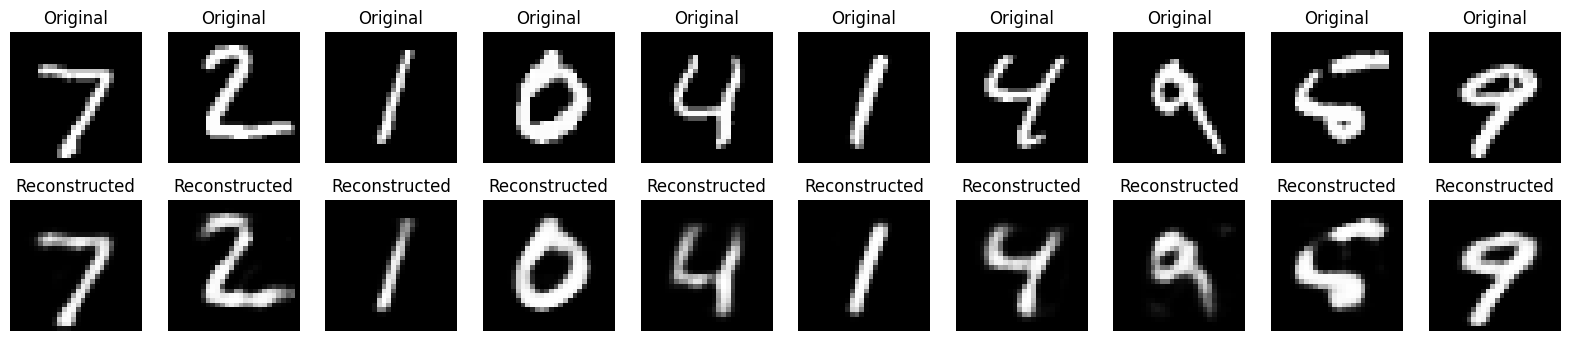

In [2]:
import matplotlib.pyplot as plt

# reconstruct the test set from autoencoder
decoded_imgs = autoencoder.predict(X_test)

n = 10  # how many digits to display
plt.figure(figsize=(20,4))

for i in range(n):

    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()
